In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
apps = pd.read_csv(r"C:\Users\hp\Downloads\archive (8)\datasets\apps.csv")
reviews = pd.read_csv(r"C:\Users\hp\Downloads\archive (8)\datasets\user_reviews.csv")

In [4]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
apps['Size'] = apps['Size'].astype(str)

In [8]:
apps['Size'] = apps['Size'].str.replace('M', '', regex=False)
apps['Size'] = apps['Size'].str.replace('k', '', regex=False)
apps['Size'] = apps['Size'].str.replace('Varies with device', '', regex=False)

In [9]:
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')

In [10]:
apps['Size'].head()
apps['Size'].describe()

count    8432.000000
mean       20.395327
std        21.827509
min         0.000000
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

In [11]:
apps.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [13]:
apps['Rating'] = apps['Rating'].fillna(apps['Rating'].median())
apps['Size'] = apps['Size'].fillna(apps['Size'].median())

apps = apps.dropna(subset=['Type', 'Content Rating'])

In [14]:
apps.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [15]:
apps['Current Ver'] = apps['Current Ver'].fillna('Unknown')
apps['Android Ver'] = apps['Android Ver'].fillna('Unknown')

In [16]:
apps.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [17]:
apps.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
apps['Installs'] = apps['Installs'].str.replace('+', '', regex=False)
apps['Installs'] = apps['Installs'].str.replace(',', '', regex=False)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

In [19]:
apps['Price'] = apps['Price'].str.replace('$', '', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

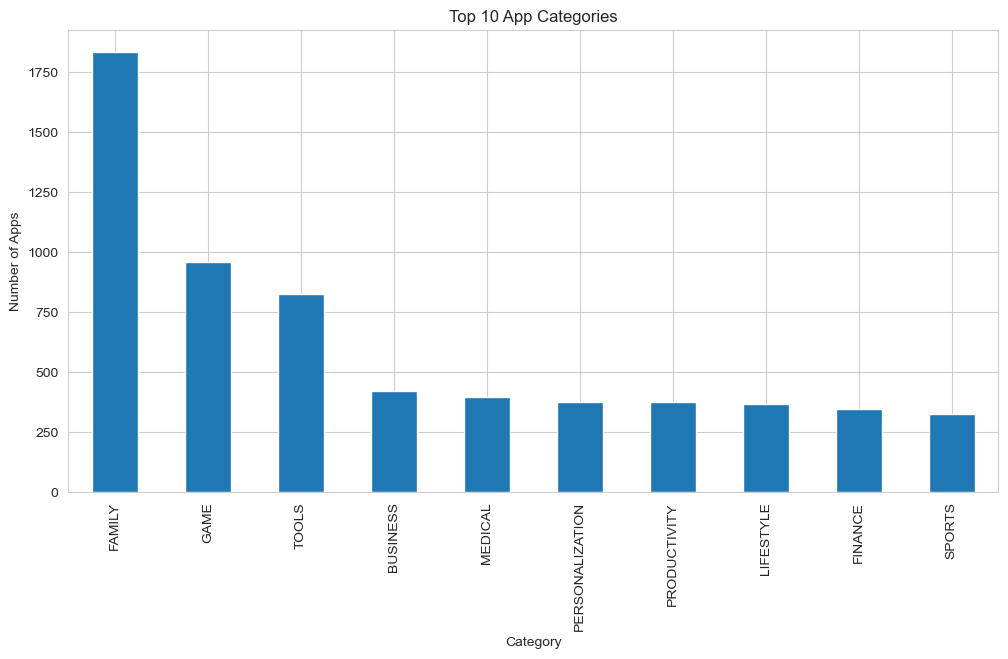

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
apps['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

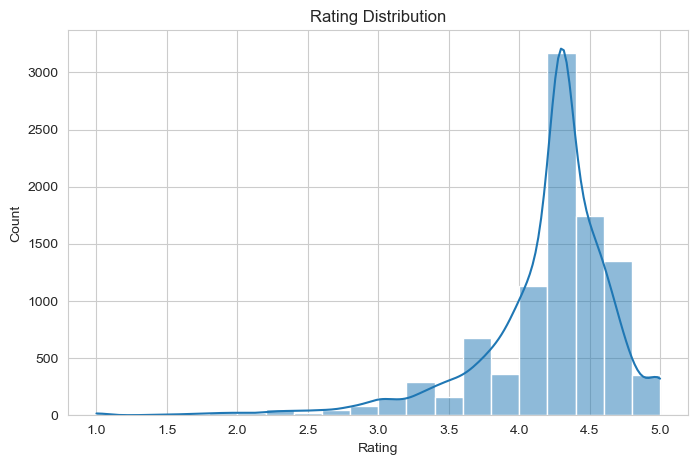

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()

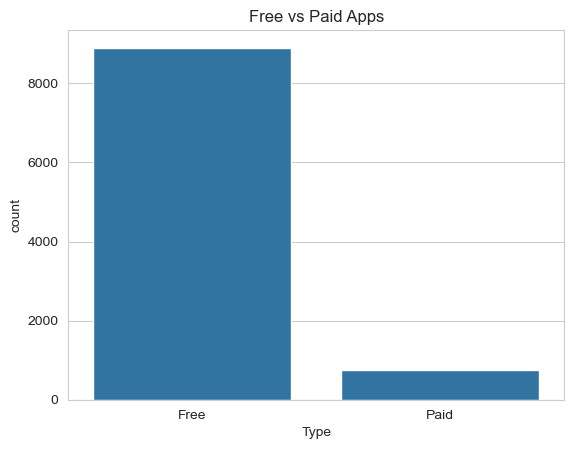

In [22]:
sns.countplot(x='Type', data=apps)
plt.title("Free vs Paid Apps")
plt.show()

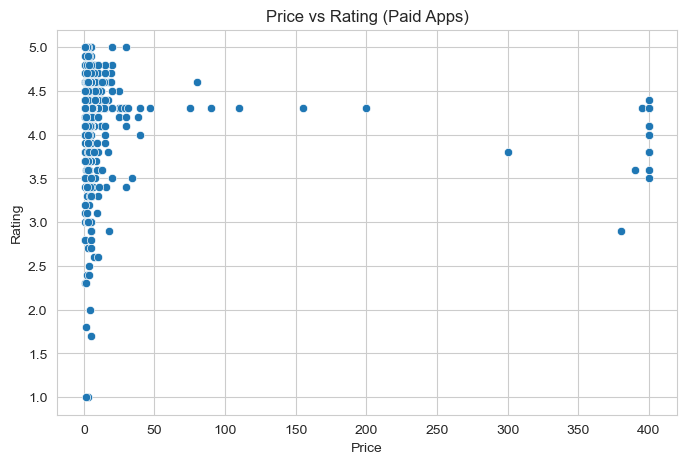

In [23]:
paid_apps = apps[apps['Type'] == 'Paid']

plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title("Price vs Rating (Paid Apps)")
plt.show()

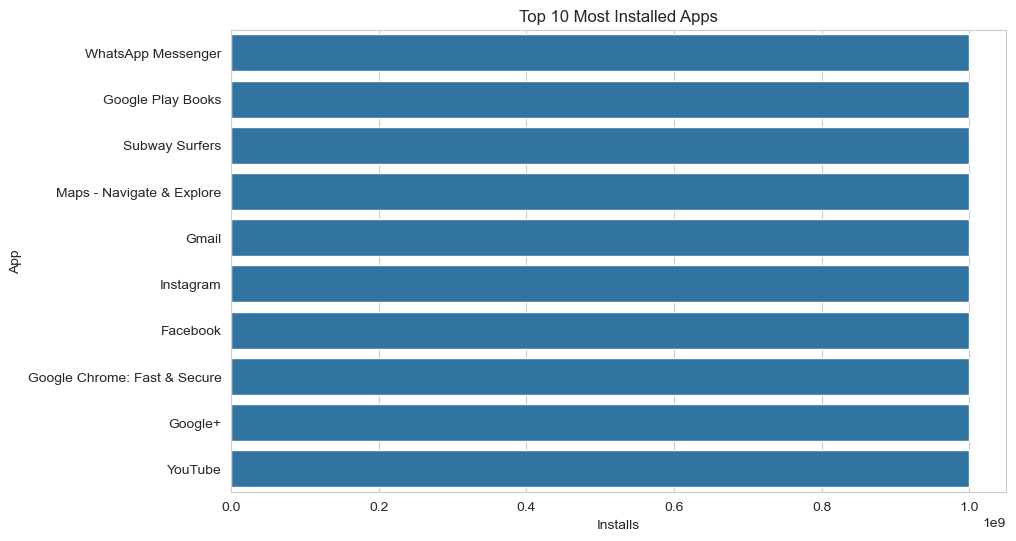

In [24]:
top_installs = apps.sort_values(by='Installs', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Installs', y='App', data=top_installs)
plt.title("Top 10 Most Installed Apps")
plt.show()

In [25]:
merged = pd.merge(apps, reviews, on='App', how='inner')

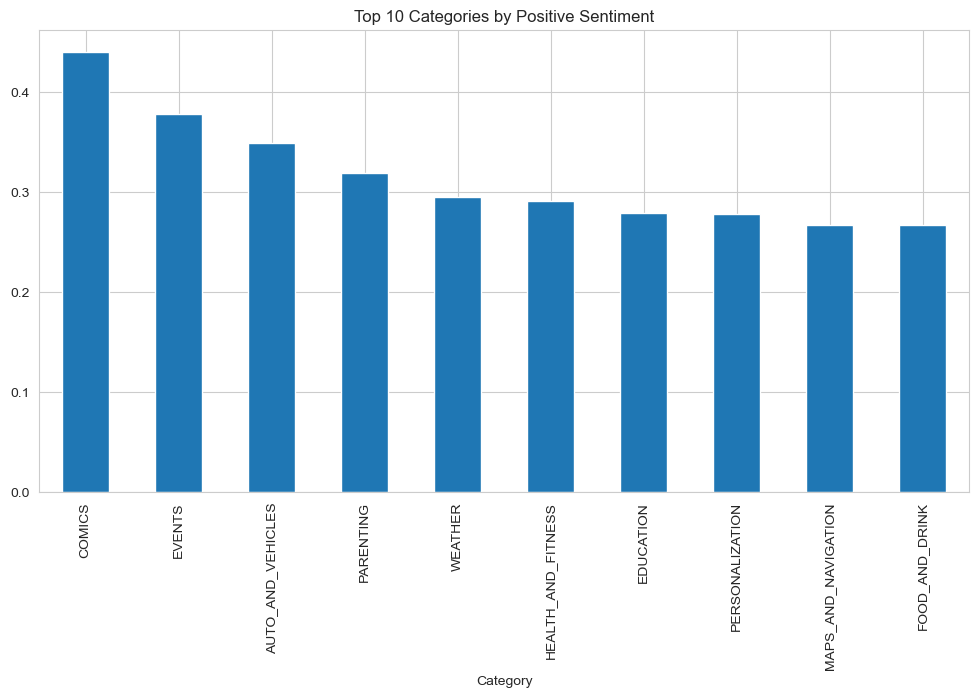

In [26]:
sentiment_category = merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sentiment_category.head(10).plot(kind='bar')
plt.title("Top 10 Categories by Positive Sentiment")
plt.show()

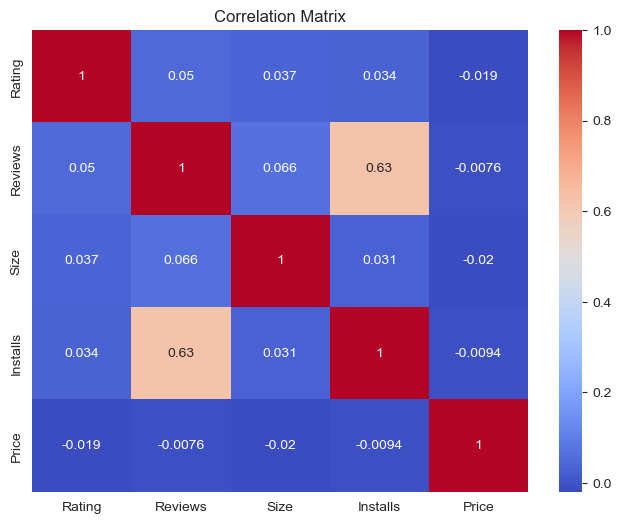

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(apps.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

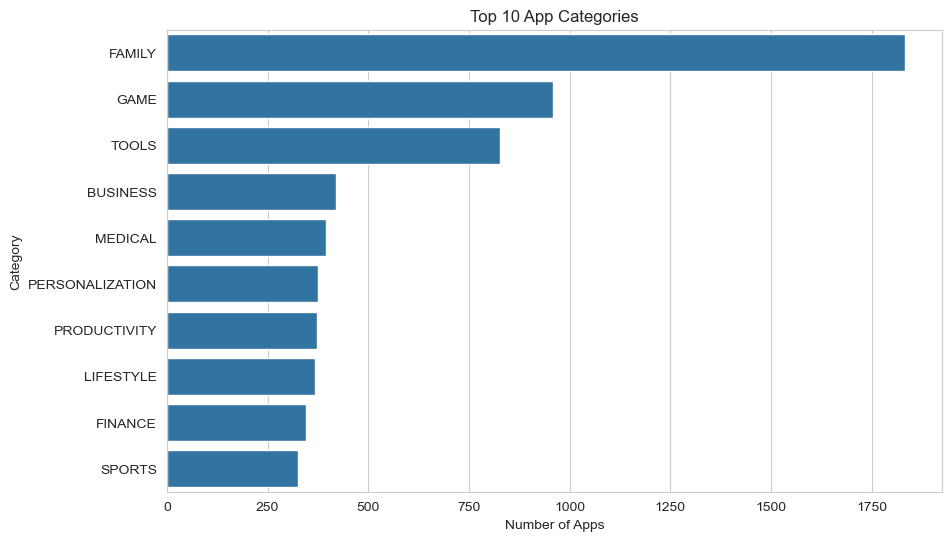

In [28]:
# Top 10 categories by number of apps
top_categories = apps['Category'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 App Categories")
plt.xlabel("Number of Apps")
plt.show()

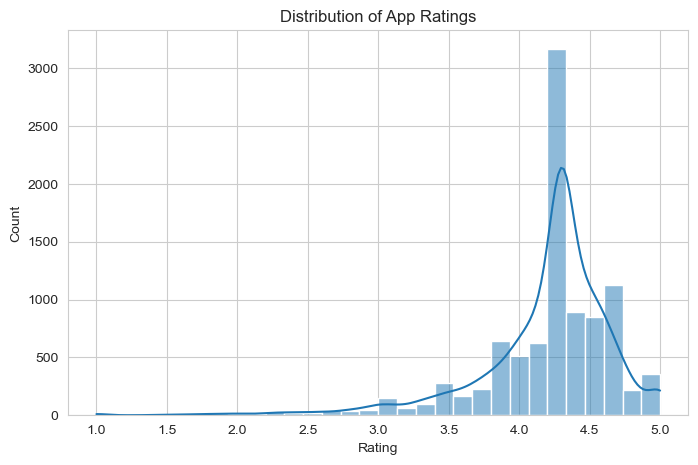

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'], bins=30, kde=True)
plt.title("Distribution of App Ratings")
plt.show()

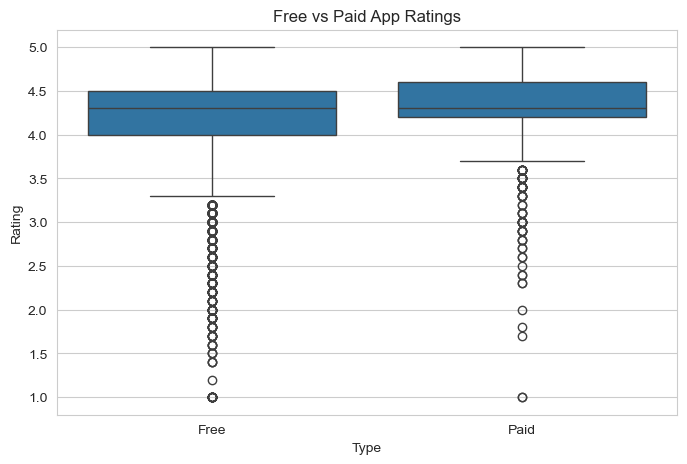

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=apps)
plt.title("Free vs Paid App Ratings")
plt.show()

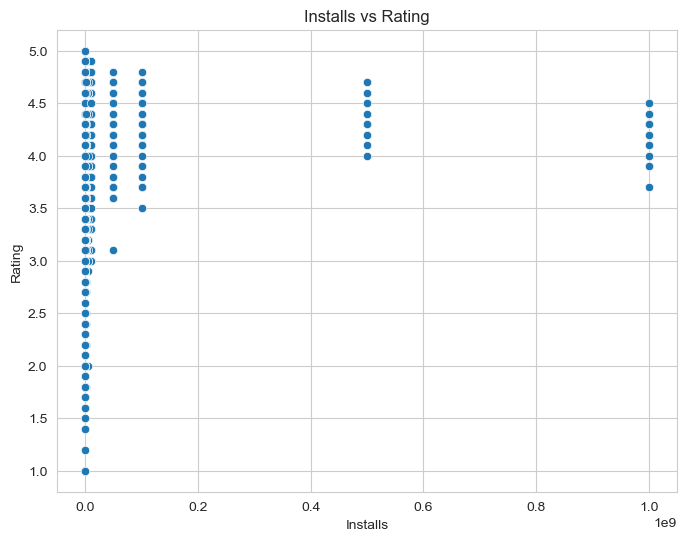

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Installs', y='Rating', data=apps)
plt.title("Installs vs Rating")
plt.show()

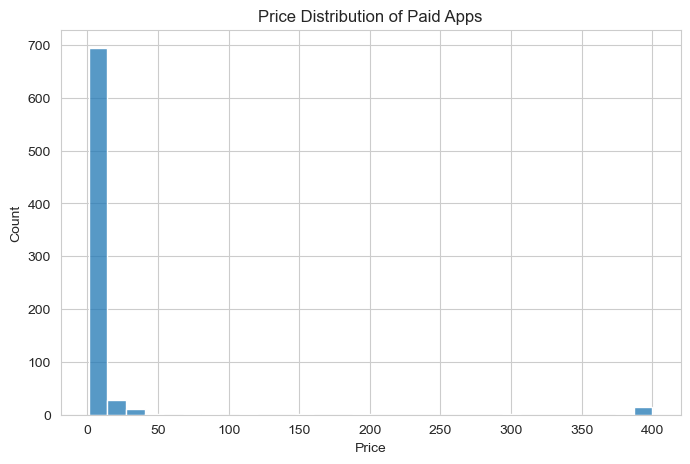

In [32]:
paid_apps = apps[apps['Type'] == 'Paid']

plt.figure(figsize=(8,5))
sns.histplot(paid_apps['Price'], bins=30)
plt.title("Price Distribution of Paid Apps")
plt.show()

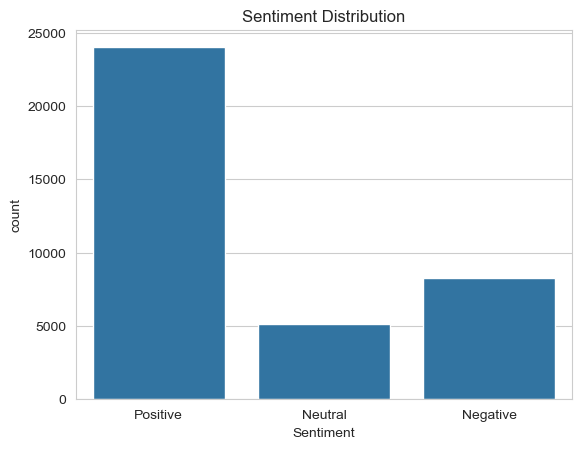

In [33]:
sns.countplot(x='Sentiment', data=reviews)
plt.title("Sentiment Distribution")
plt.show()

In [35]:
print(reviews.columns)

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [36]:
reviews.groupby('App')['Sentiment_Polarity'].mean().sort_values(ascending=False).head(10)

App
HomeWork                                              1.000000
Google Slides                                         0.933333
Daily Workouts - Exercise Fitness Routine Trainer     0.800000
Bed Time Fan - White Noise Sleep Sounds               0.781250
Cameringo Lite. Filters Camera                        0.770269
Google Primer                                         0.750000
GPS Map Free                                          0.700000
GPS Speedometer and Odometer                          0.687500
Best Ovulation Tracker Fertility Calendar App Glow    0.595313
3D Live Neon Weed Launcher                            0.568182
Name: Sentiment_Polarity, dtype: float64

In [41]:
apps['Category'].value_counts().head(10)

Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64

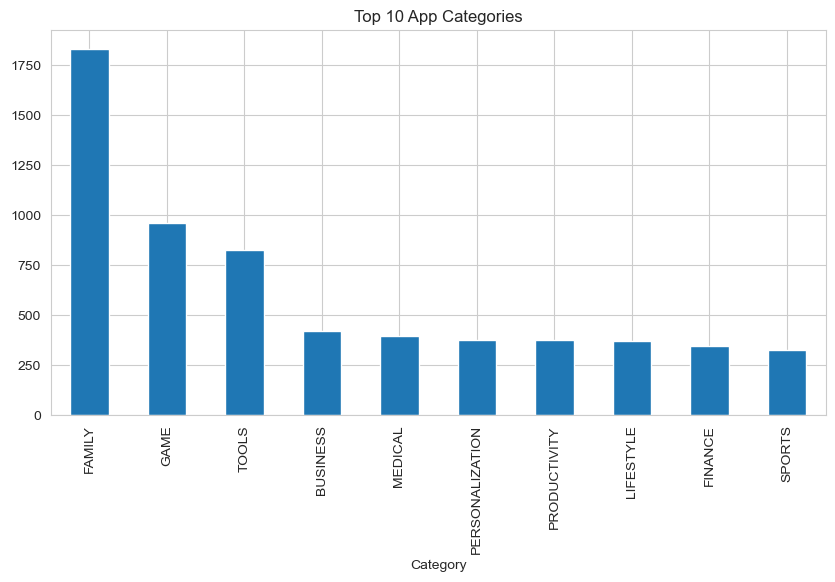

In [42]:
plt.figure(figsize=(10,5))
apps['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 App Categories")
plt.show()

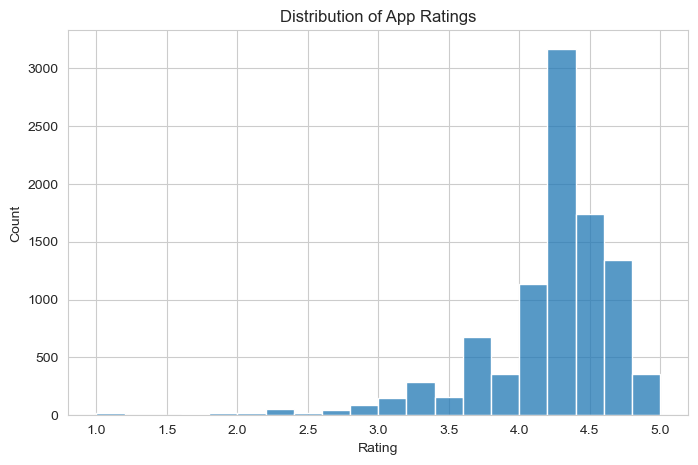

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'], bins=20)
plt.title("Distribution of App Ratings")
plt.show()

In [44]:
apps['Type'].value_counts()

Type
Free    8903
Paid     756
Name: count, dtype: int64

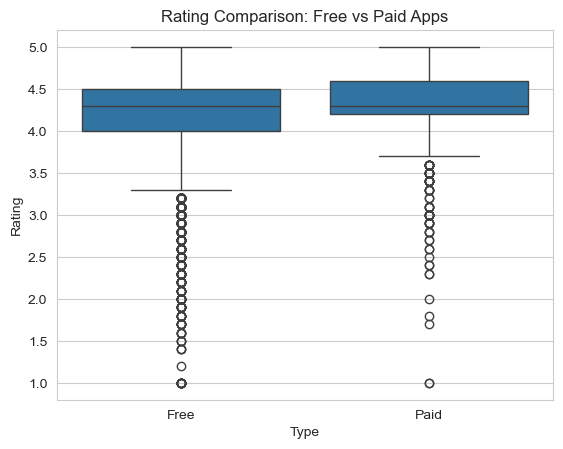

In [45]:
sns.boxplot(x='Type', y='Rating', data=apps)
plt.title("Rating Comparison: Free vs Paid Apps")
plt.show()

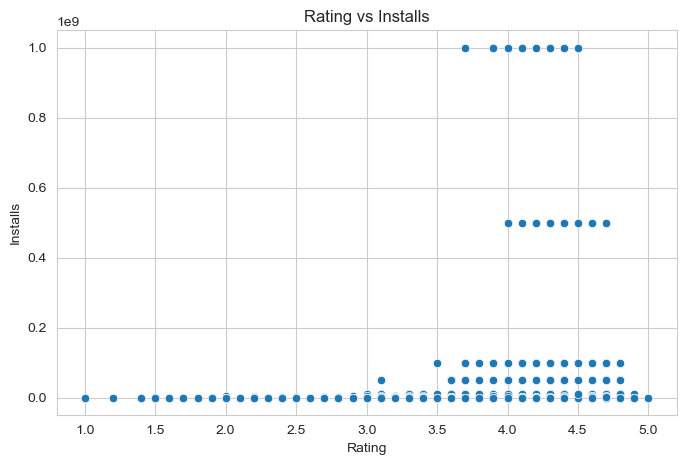

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Installs', data=apps)
plt.title("Rating vs Installs")
plt.show()

In [47]:
merged = pd.merge(apps, reviews, on='App')
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
